In [2]:
#importing the files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the csv file
df=pd.read_csv("outputd1005.csv")

In [3]:
df.describe()

,average insect count,"Dew Point, *C, WEASN17 Osmia 2023","Gust Speed, m/s, WEASN17 Osmia 2023","RH, %, WEASN17 Osmia 2023 Air humidity","Temperature, *C, WEASN17 Osmia 2023 AIr temperature","Solar Radiation, W/m^2, WEASN17 Osmia 2023 Radiation"
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1.616208,12.744429,0.740476,74.909048,17.853452,151.907143
std,0.278362,1.988553,0.795279,20.176109,3.123269,192.058781
min,1.000000,9.753000,0.000000,46.400000,13.804000,1.000000
25%,1.438103,10.334500,0.050000,52.500000,14.660500,18.600000
50%,1.637413,13.534500,0.375000,80.800000,18.905500,79.450000
75%,1.814173,14.017000,1.362500,95.270000,21.100250,237.650000
max,2.404658,16.166000,3.350000,96.800000,21.743000,824.200000


In [6]:
X=df.iloc[:,4:9] #environmental features attributes


y=df.iloc[:, 2].values   #average insect count

In [7]:
#Preparing the data for the training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33, 5) (9, 5) (33,) (9,)


In [9]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [10]:
regressor = RandomForestRegressor(n_estimators = 20,random_state=0 )
ll_rf=regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

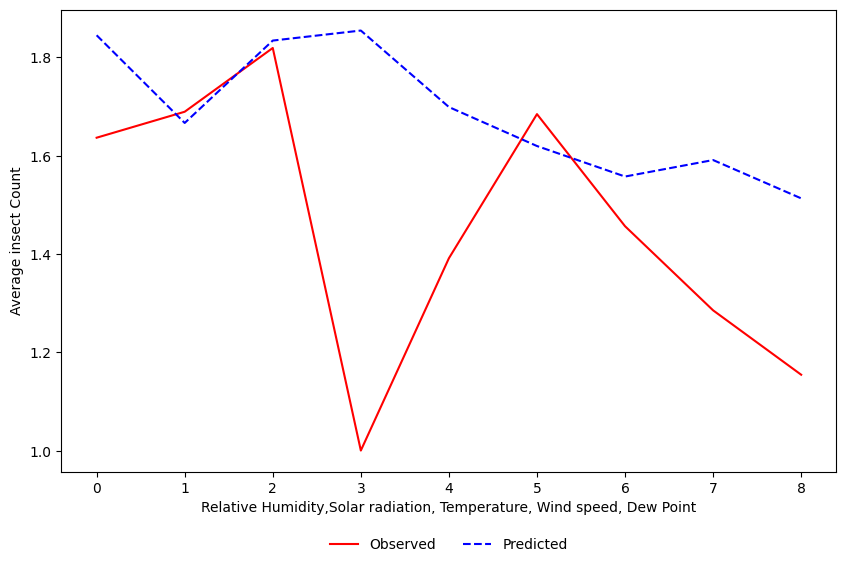

In [12]:
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label="Observed", color="red", linestyle='-')
plt.plot(x_ax, y_pred, label="Predicted", color="blue", linestyle='--')

plt.ylabel('Average insect Count')
plt.xlabel('Relative Humidity,Solar radiation, Temperature, Wind speed, Dew Point')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)
plt.show()


c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


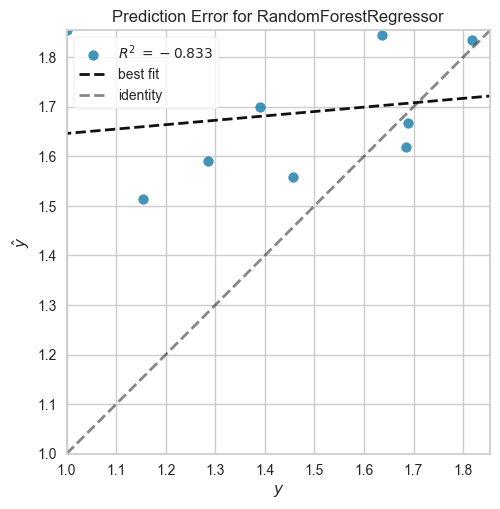

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
from yellowbrick.regressor import PredictionError

visualizer=PredictionError(ll_rf)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()


c:\Users\JRF_Awadh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


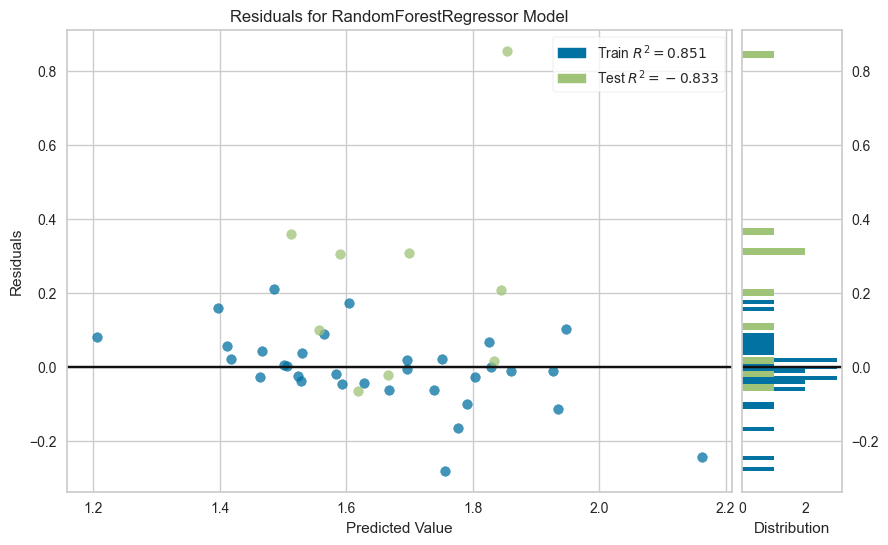

In [15]:
from matplotlib import pyplot as plt
from yellowbrick.regressor import residuals_plot

plt.rcParams['figure.figsize'] = (10, 6)

# Your code for model training and prediction

 #Plotting the residuals
residuals_plot(regressor, X_train, y_train, X_test, y_test)

plt.show()


In [17]:
from sklearn.metrics import r2_score

# Assuming you have already trained the Random Forest Regressor model
y_train_pred = regressor.predict(X_train)  # Replace rf_regressor with your trained model variable

# Calculate the R2 score for the training dataset
r2_train = r2_score(y_train, y_train_pred)  # Replace y_train with your actual target values for the training dataset

print("R2 Score (Training):", r2_train*100 ,"%")


R2 Score (Training): 85.1428869845421 %
